In [3]:
#  Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('/Users/elvislleshi/Desktop/Data mining 2/dm2_dataset_2425_imdb 3/imdb_cleaned_finale.csv')

# Zgjedhim vetëm këto veçori
selected_cols = [
    'runtimeMinutes', 'awardWins', 'totalCredits', 'criticReviewsTotal',
    'isAdult', 'ratingCount', 'companiesNumber', 'writerCredits', 'directorsCredits'
]

In [5]:
# 1️⃣ Merr vetëm rreshtat që kanë genres të plotë (pa NaN)
df = df.dropna(subset=['genres'])

# 2️⃣ Zgjidh X dhe y
X = df[selected_cols]
y = df['genres']

# 3️⃣ Label Encoding për targetin
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# (Opsionale) Kontrollo shpërndarjen për të shmangur klasat shumë të rralla
genre_counts = pd.Series(y_encoded).value_counts()
print("📊 Shpërndarja e klasave të genres (encoded):")
print(genre_counts)

# 4️⃣ Train/test split me stratifikim
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
)

# 5️⃣ Standardizim (nëse modelet e kërkojnë, si SVM, MLP, Logistic)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6️⃣ (Opsionale) Ruaj emrat e klasave për analizë më vonë
class_names = le.classes_


📊 Shpërndarja e klasave të genres (encoded):
5     35984
8     25916
0     18931
7     13156
6     10150
2      9092
3      7852
22     3155
19     2788
28     2691
1      2612
4      2542
14     2332
9      1948
27     1734
12     1544
15     1168
25      790
20      742
24      723
10      662
23      612
21      589
17      555
18      508
16      390
13      261
26       99
11        5
Name: count, dtype: int64


In [7]:
# 1️⃣ Identifiko zhanret e rralla (<1000)
genre_counts = df['genres'].value_counts()
rare_genres = genre_counts[genre_counts < 1000].index

# 2️⃣ Krijo një kolonë të re me emrin "main_genre"
df['main_genre'] = df['genres'].apply(lambda x: 'Other' if x in rare_genres else x)

# 3️⃣ Label Encoding për targetin e ri
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['main_genre'])

# 4️⃣ Train-test split + standardizim
X = df[selected_cols]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5️⃣ Ruaj klasat
class_names = le.classes_

# 6️⃣ Printo rezultatet
print(f"\n✅ Klasa për 'main_genre': {len(class_names)}")
print("🎭 Emrat e klasave:", class_names)



✅ Klasa për 'main_genre': 18
🎭 Emrat e klasave: ['Action' 'Adult' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Game-Show' 'Horror' 'Music' 'Other'
 'Reality-TV' 'Short' 'Western' '\\N']


In [10]:
# 1️⃣ Zëvendëso vlerat '\N' me 'Other'
df['genres'] = df['genres'].replace('\\N', 'Other')

# 2️⃣ Rifresko grupimin për main_genre
genre_counts = df['genres'].value_counts()
rare_genres = genre_counts[genre_counts < 1000].index

df['main_genre'] = df['genres'].apply(lambda x: 'Other' if x in rare_genres else x)

# 3️⃣ Label Encoding për targetin e ri
le = LabelEncoder()
y = le.fit_transform(df['main_genre'])

# 4️⃣ Train-test split dhe standardizim
X = df[selected_cols]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5️⃣ Emrat e klasave
class_names = le.classes_
print(f"\n✅ Klasa për 'main_genre' pas përditësimit: {len(class_names)}")
print("🎭 Emrat e klasave:", class_names)



✅ Klasa për 'main_genre' pas përditësimit: 17
🎭 Emrat e klasave: ['Action' 'Adult' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Game-Show' 'Horror' 'Music' 'Other'
 'Reality-TV' 'Short' 'Western']


In [9]:
### Random forest

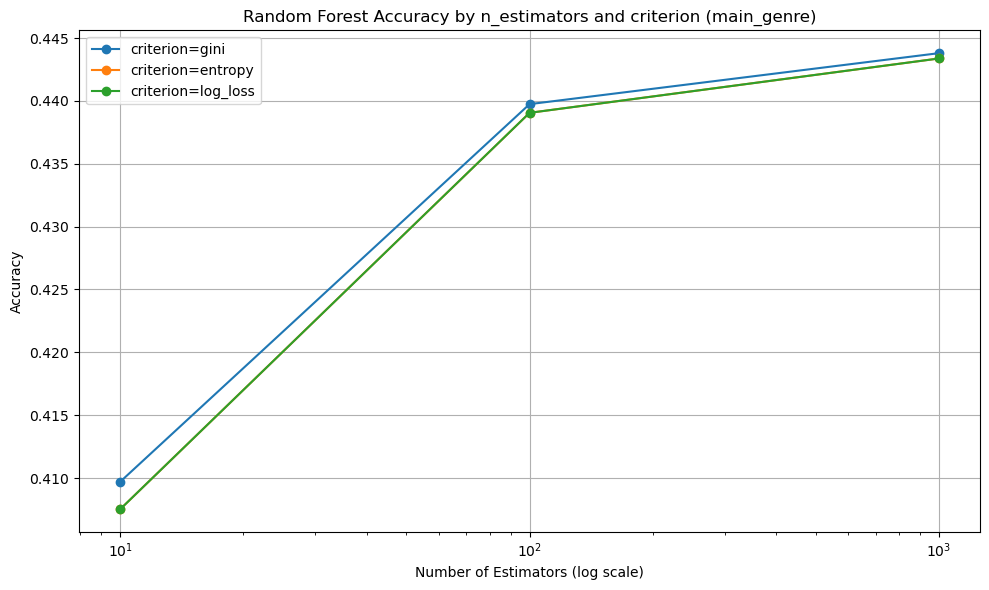


📊 Accuracy Table:
  criterion  n_estimators  accuracy
0      gini            10     0.410
1      gini           100     0.440
2      gini          1000     0.444
3   entropy            10     0.408
4   entropy           100     0.439
5   entropy          1000     0.443
6  log_loss            10     0.408
7  log_loss           100     0.439
8  log_loss          1000     0.443


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Parametrat për testim
n_estimators = [10, 100, 1000]
criteria = ['gini', 'entropy', 'log_loss']
results = []

# 2️⃣ Testim për çdo kombinim
for crit in criteria:
    for n in n_estimators:
        model = RandomForestClassifier(n_estimators=n, criterion=crit, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({'criterion': crit, 'n_estimators': n, 'accuracy': acc})

# 3️⃣ Krijo DataFrame për rezultatet
rf_results_df = pd.DataFrame(results)

# 4️⃣ Vizualizim me barplot
plt.figure(figsize=(10, 6))
for crit in criteria:
    subset = rf_results_df[rf_results_df['criterion'] == crit]
    plt.plot(subset['n_estimators'], subset['accuracy'], marker='o', label=f'criterion={crit}')

plt.xscale('log')
plt.xlabel('Number of Estimators (log scale)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy by n_estimators and criterion (main_genre)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5️⃣ Shfaq rezultatet
print("\n📊 Accuracy Table:")
print(rf_results_df.round(3))


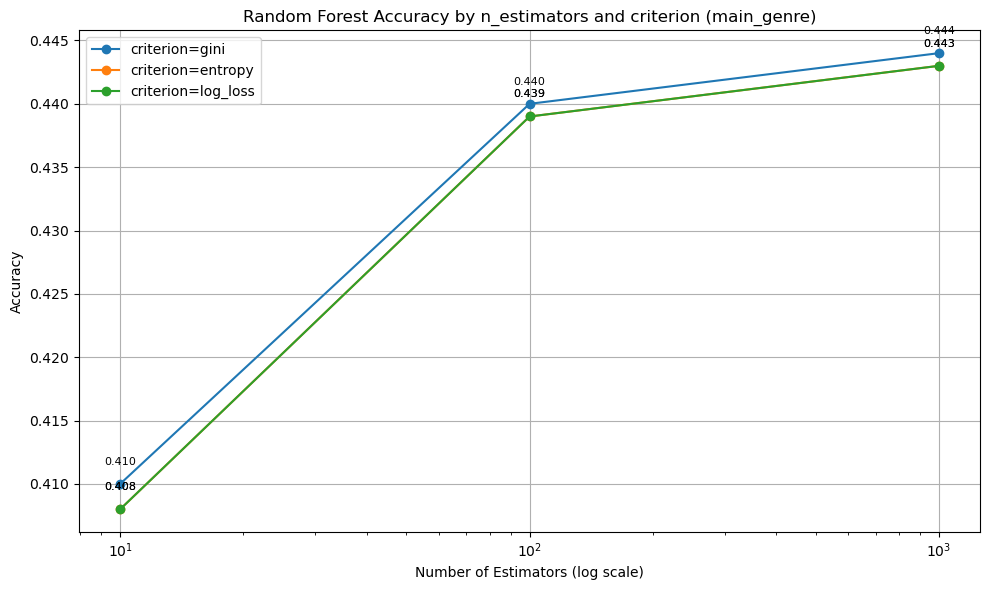

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 📊 Accuracy Table (nëse nuk e ke ende)
rf_results_df = pd.DataFrame({
    'criterion': ['gini', 'gini', 'gini', 'entropy', 'entropy', 'entropy', 'log_loss', 'log_loss', 'log_loss'],
    'n_estimators': [10, 100, 1000, 10, 100, 1000, 10, 100, 1000],
    'accuracy': [0.410, 0.440, 0.444, 0.408, 0.439, 0.443, 0.408, 0.439, 0.443]
})

criteria = ['gini', 'entropy', 'log_loss']

# 📈 Grafiku me vlera të shfaqura
plt.figure(figsize=(10, 6))
for crit in criteria:
    subset = rf_results_df[rf_results_df['criterion'] == crit]
    plt.plot(subset['n_estimators'], subset['accuracy'], marker='o', label=f'criterion={crit}')
    for x, y in zip(subset['n_estimators'], subset['accuracy']):
        plt.text(x, y + 0.0015, f'{y:.3f}', ha='center', fontsize=8, color='black')

plt.xscale('log')
plt.xlabel('Number of Estimators (log scale)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy by n_estimators and criterion (main_genre)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Rezultatet që kemi marrë më herët
rf_results_df = pd.DataFrame({
    'criterion': ['gini', 'gini', 'gini', 'entropy', 'entropy', 'entropy', 'log_loss', 'log_loss', 'log_loss'],
    'n_estimators': [10, 100, 1000, 10, 100, 1000, 10, 100, 1000],
    'accuracy': [0.410, 0.440, 0.444, 0.408, 0.439, 0.443, 0.408, 0.439, 0.443]
})

# Merr konfigurimin më të mirë
best_rf = rf_results_df.loc[rf_results_df['accuracy'].idxmax()]
best_crit = best_rf['criterion']
best_n = int(best_rf['n_estimators'])

print(f"✅ Best RF Config: criterion={best_crit}, n_estimators={best_n}")


✅ Best RF Config: criterion=gini, n_estimators=1000


In [12]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Krijo modelin më të mirë (bazuar në konfigurimin më të lartë)
best_rf_model = RandomForestClassifier(
    n_estimators=1000,
    criterion='gini',
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Parashikimi me modelin më të mirë
y_pred = best_rf_model.predict(X_test)

# Gjenerimi i classification report
report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

# Konvertimi në DataFrame për shfaqje dhe ruajtje
report_df = pd.DataFrame(report_dict).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

# Shfaq rezultatin
print("\n📋 Classification Report – Best Random Forest:")
print(report_df.round(2).to_string())



📋 Classification Report – Best Random Forest:
              precision  recall  f1-score  support
Action             0.52    0.49      0.50   5679.0
Adult              0.97    1.00      0.98    784.0
Adventure          0.53    0.33      0.40   2728.0
Animation          0.49    0.44      0.47   2356.0
Biography          0.24    0.07      0.11    763.0
Comedy             0.48    0.58      0.52  10795.0
Crime              0.47    0.34      0.39   3045.0
Documentary        0.39    0.44      0.41   3947.0
Drama              0.38    0.50      0.43   7775.0
Family             0.38    0.22      0.28    584.0
Game-Show          0.42    0.33      0.37    463.0
Horror             0.22    0.10      0.13    700.0
Music              0.20    0.09      0.12    350.0
Other              0.23    0.14      0.18   2588.0
Reality-TV         0.35    0.35      0.35    836.0
Short              0.27    0.21      0.24    947.0
Western            0.56    0.46      0.50    520.0
accuracy            NaN     NaN    

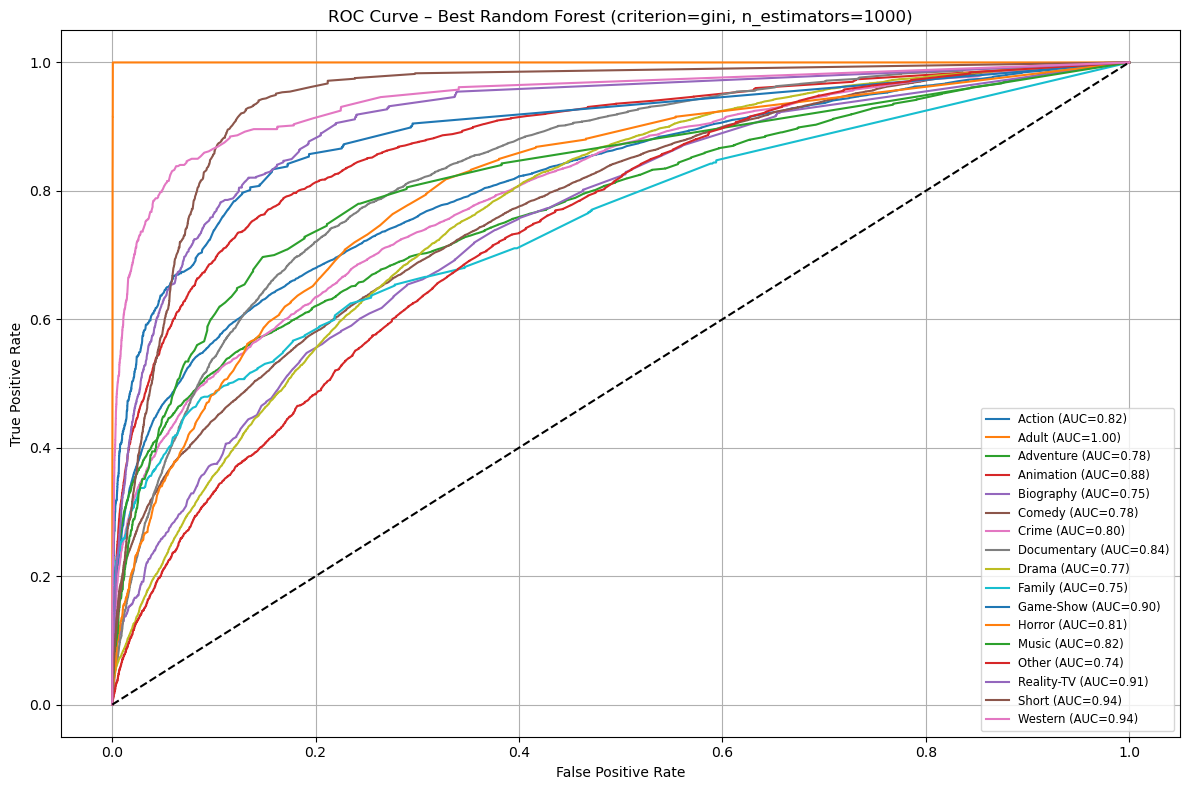

In [14]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarizimi i target-it për klasifikim multi-class
n_classes = len(np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=range(n_classes))
y_score = best_rf_model.predict_proba(X_test)

# Llogaritja e ROC për çdo klasë
fpr, tpr, roc_auc = {}, {}, {}
available_classes = np.where(np.sum(y_test_bin, axis=0) > 0)[0]

plt.figure(figsize=(12, 8))
for i in available_classes:
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title(f'ROC Curve – Best Random Forest (criterion=gini, n_estimators=1000)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_81917/1171712176.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


NameError: name 'best_crit' is not defined

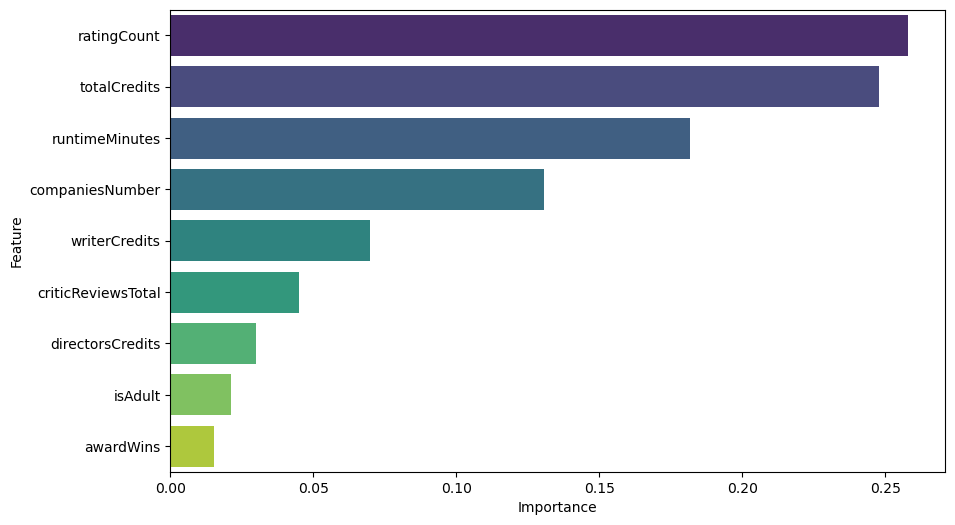

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merr rëndësinë e veçorive
importances = best_rf_model.feature_importances_
feature_names = df[selected_cols].columns.tolist()

# Krijo DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

# Vizualizo
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title(f'Top 10 Feature Importance – Random Forest (criterion={best_crit}, n_estimators={best_n})')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_81917/145329217.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


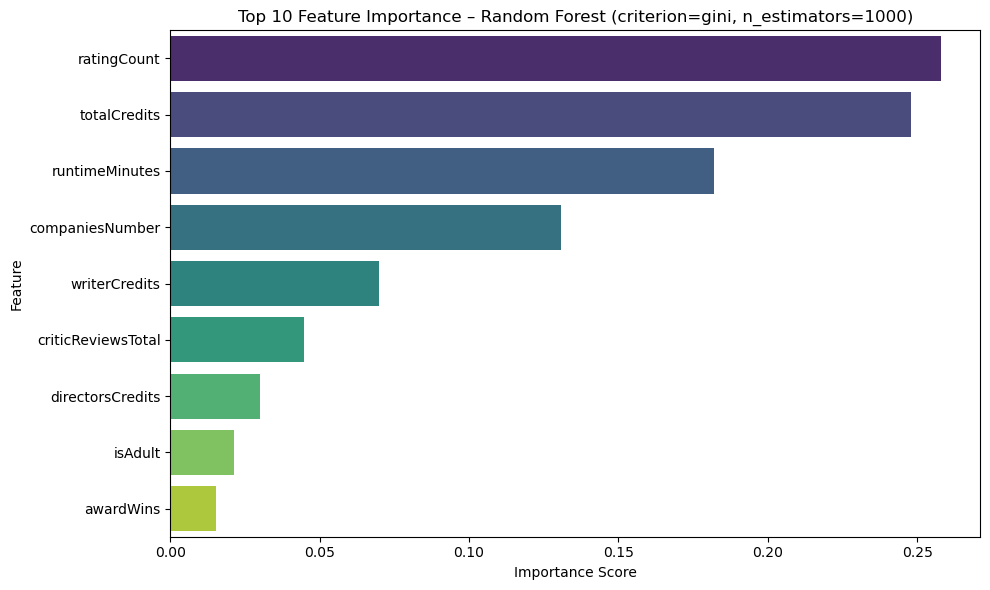

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Merr rëndësinë e veçorive nga modeli
importances = best_rf_model.feature_importances_
feature_names = df[selected_cols].columns.tolist()

# 2️⃣ Krijo DataFrame dhe selekto top 10
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

# 3️⃣ Vizualizo
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importance – Random Forest (criterion=gini, n_estimators=1000)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [20]:
##logistic regression

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


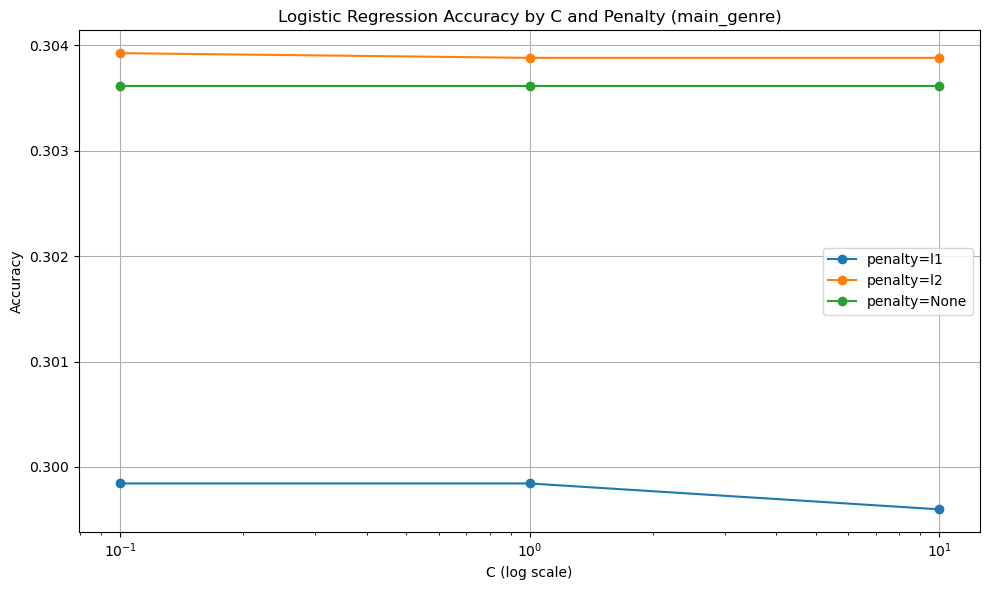


📊 Logistic Regression Accuracy Table:
  penalty     C  accuracy
0      l1   0.1     0.300
1      l1   1.0     0.300
2      l1  10.0     0.300
3      l2   0.1     0.304
4      l2   1.0     0.304
5      l2  10.0     0.304
6    None   0.1     0.304
7    None   1.0     0.304
8    None  10.0     0.304


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Parametrat për testim
penalties = ['l1', 'l2', None]
Cs = [0.1, 1, 10]
solver_map = {
    'l1': 'liblinear',
    'l2': 'lbfgs',
    None: 'lbfgs'
}

# Lista për ruajtjen e rezultateve
results = []

# Testim për çdo kombinim të penalty dhe C
for pen in penalties:
    for C in Cs:
        try:
            model = LogisticRegression(
                C=C,
                penalty=pen,
                solver=solver_map[pen],
                max_iter=1000,
                multi_class='multinomial' if pen != 'l1' else 'auto'
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append({'penalty': str(pen), 'C': C, 'accuracy': acc})
        except Exception as e:
            print(f"⚠️ Error with penalty={pen}, C={C}: {e}")

# Krijo DataFrame me rezultatet
logreg_results = pd.DataFrame(results)

# Vizualizim grafik
plt.figure(figsize=(10, 6))
for pen in penalties:
    subset = logreg_results[logreg_results['penalty'] == str(pen)]
    plt.plot(subset['C'], subset['accuracy'], marker='o', label=f'penalty={pen}')

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy by C and Penalty (main_genre)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Tabela e rezultateve
print("\n📊 Logistic Regression Accuracy Table:")
print(logreg_results.round(3))


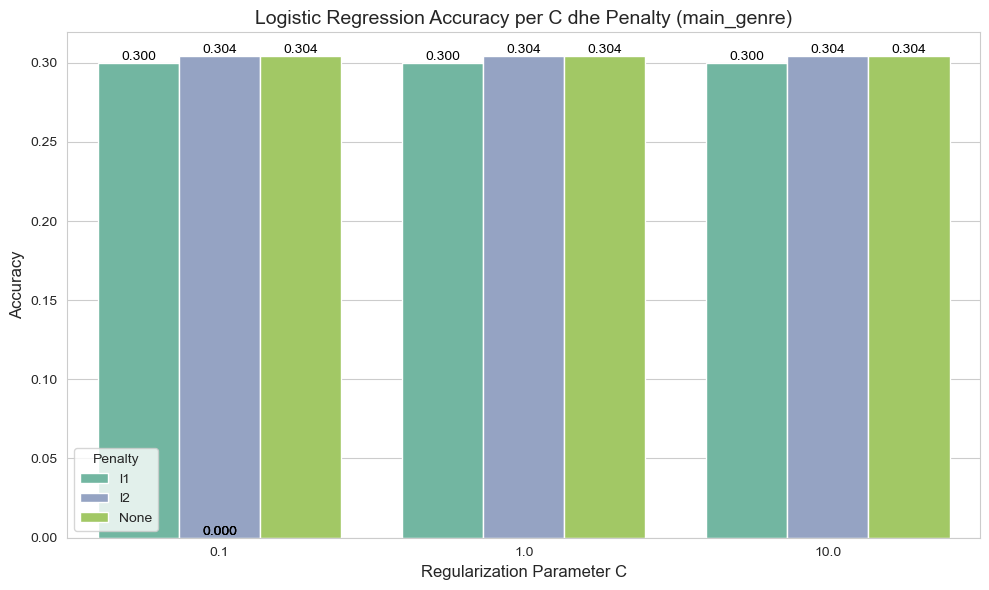

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rezultatet për Logistic Regression
logreg_results = pd.DataFrame({
    'penalty': ['l1', 'l1', 'l1', 'l2', 'l2', 'l2', 'None', 'None', 'None'],
    'C': [0.1, 1.0, 10.0, 0.1, 1.0, 10.0, 0.1, 1.0, 10.0],
    'accuracy': [0.300, 0.300, 0.300, 0.304, 0.304, 0.304, 0.304, 0.304, 0.304]
})

# Konverto C në string për boshtin x
logreg_results['C'] = logreg_results['C'].astype(str)

# Paletë pa portokalli
custom_palette = sns.color_palette(['#66c2a5', '#8da0cb', '#a6d854'])  # ngjyra të lehta

# Grafiku
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(data=logreg_results, x='C', y='accuracy', hue='penalty', palette=custom_palette)

# Vlera sipër çdo shtylle
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.3f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black')

plt.title('Logistic Regression Accuracy per C dhe Penalty (main_genre)', fontsize=14)
plt.xlabel('Regularization Parameter C', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(title='Penalty')
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic


📋 Classification Report – Logistic Regression:
              precision  recall  f1-score  support
Action             0.22    0.03      0.05   5679.0
Adult              0.97    1.00      0.98    784.0
Adventure          0.00    0.00      0.00   2728.0
Animation          0.36    0.23      0.28   2356.0
Biography          0.17    0.00      0.00    763.0
Comedy             0.28    0.71      0.41  10795.0
Crime              0.40    0.01      0.03   3045.0
Documentary        0.29    0.33      0.31   3947.0
Drama              0.31    0.38      0.35   7775.0
Family             0.00    0.00      0.00    584.0
Game-Show          0.00    0.00      0.00    463.0
Horror             0.26    0.03      0.05    700.0
Music              0.00    0.00      0.00    350.0
Other              0.16    0.00      0.00   2588.0
Reality-TV         0.00    0.00      0.00    836.0
Short              0.24    0.20      0.22    947.0
Western            0.00    0.00      0.00    520.0
accuracy            NaN     NaN   

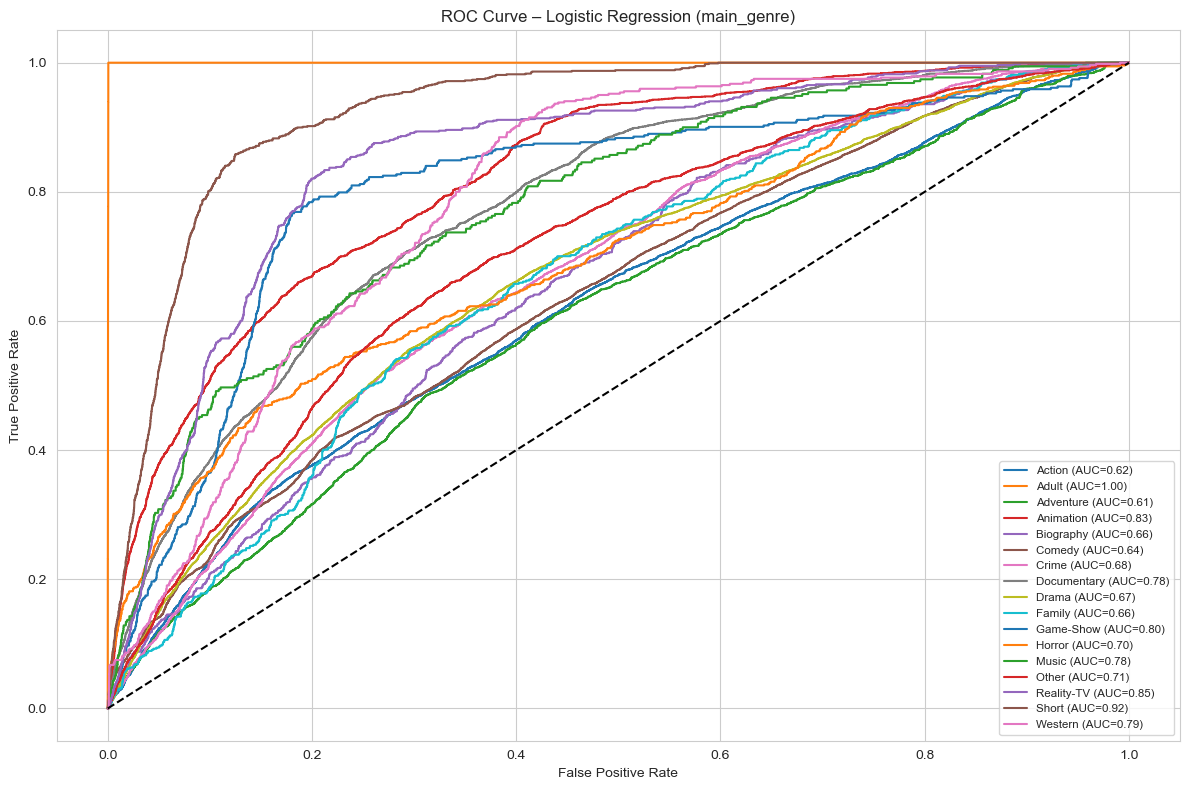

/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_81917/1390259841.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='crest')


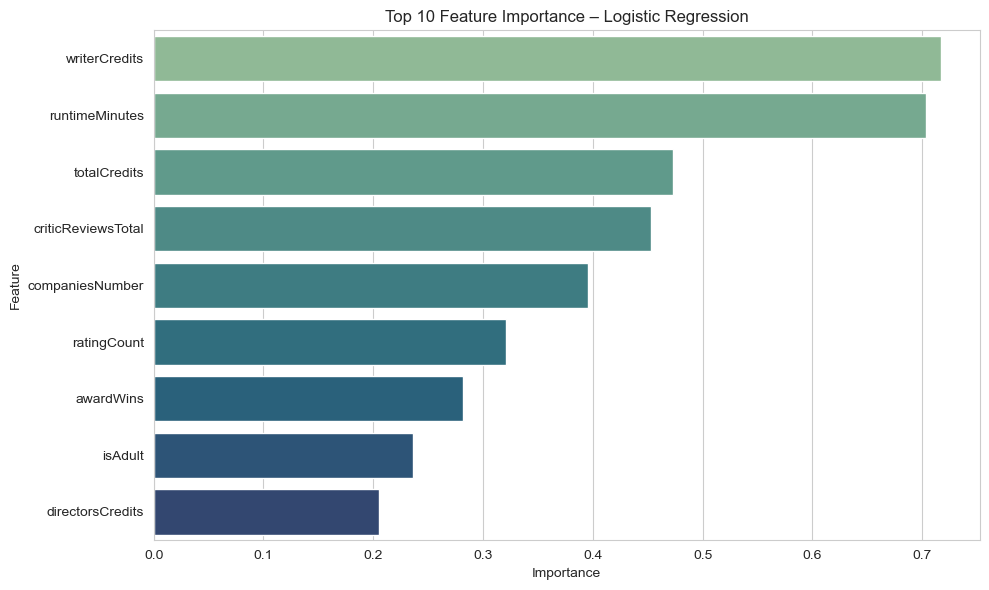

In [26]:
# 5️⃣ Trajno Logistic Regression (e optimizuar)
log_model = LogisticRegression(
    C=1.0,
    penalty='l2',
    solver='saga',              # më i shpejtë
    max_iter=500,
    multi_class='multinomial',
    n_jobs=-1
)
log_model.fit(X_train, y_train)

# 6️⃣ Parashikim dhe metrika
y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)

report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

report_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]
print("\n📋 Classification Report – Logistic Regression:")
print(report_df.round(2).to_string())

# 7️⃣ ROC Curve për të gjitha klasat
y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(12, 8))
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve – Logistic Regression (main_genre)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# 8️⃣ Feature Importance – koeficientët
importances = np.mean(np.abs(log_model.coef_), axis=0)
feature_names = X.columns.tolist()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='crest')
plt.title('Top 10 Feature Importance – Logistic Regression')
plt.tight_layout()
plt.show()

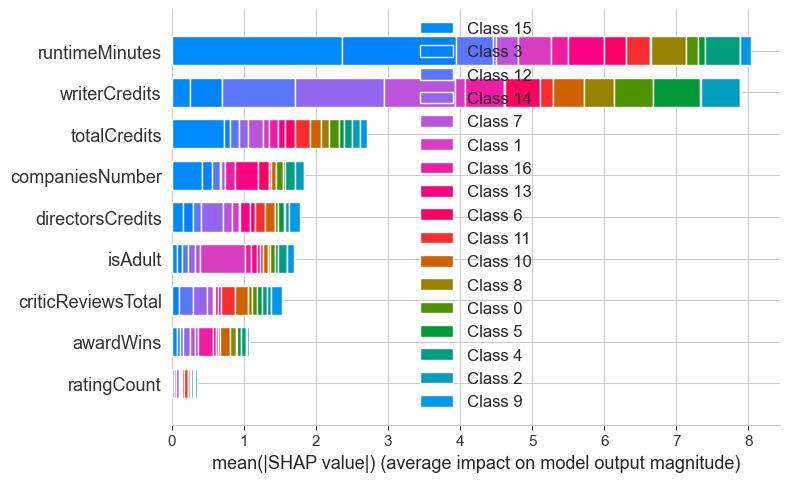

In [28]:
import shap
import matplotlib.pyplot as plt

# 1️⃣ Krijo SHAP explainer për LogisticRegression
explainer = shap.Explainer(log_model, X_train)

# 2️⃣ Llogarit SHAP values për test set
shap_values = explainer(X_test)

# 3️⃣ Vizualizo summary plot për ndikimin global të veçorive
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=df[selected_cols].columns.tolist()
)


In [32]:
##gradient boosting


📋 Classification Report – HistGradientBoostingClassifier:
              precision  recall  f1-score  support
Action             0.50    0.36      0.42   5679.0
Adult              0.97    0.99      0.98    784.0
Adventure          0.66    0.15      0.25   2728.0
Animation          0.47    0.36      0.41   2356.0
Biography          0.28    0.05      0.08    763.0
Comedy             0.41    0.63      0.50  10795.0
Crime              0.46    0.23      0.31   3045.0
Documentary        0.37    0.47      0.42   3947.0
Drama              0.35    0.50      0.41   7775.0
Family             0.60    0.15      0.24    584.0
Game-Show          0.43    0.27      0.33    463.0
Horror             0.27    0.09      0.13    700.0
Music              0.19    0.09      0.12    350.0
Other              0.34    0.09      0.15   2588.0
Reality-TV         0.39    0.28      0.33    836.0
Short              0.31    0.21      0.25    947.0
Western            0.52    0.40      0.45    520.0
accuracy            NaN

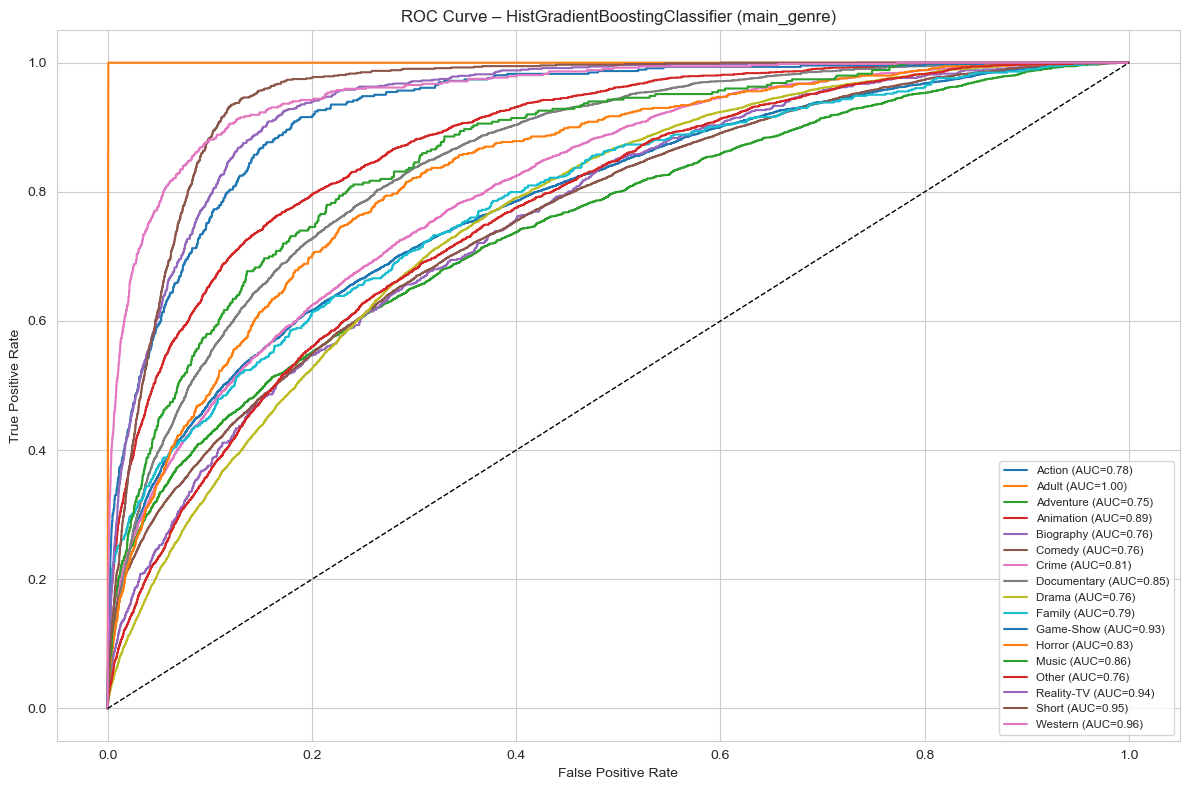

AttributeError: 'HistGradientBoostingClassifier' object has no attribute 'feature_importances_'

In [34]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# 1️⃣ Trajno modelin
hgb_model = HistGradientBoostingClassifier(random_state=42)
hgb_model.fit(X_train, y_train)

# 2️⃣ Predikime
y_pred = hgb_model.predict(X_test)
y_proba = hgb_model.predict_proba(X_test)

# 3️⃣ Classification report
report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)
report_df = pd.DataFrame(report_dict).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

print("\n📋 Classification Report – HistGradientBoostingClassifier:")
print(report_df.round(2).to_string())

# 4️⃣ ROC Curve
y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(12, 8))
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('ROC Curve – HistGradientBoostingClassifier (main_genre)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5️⃣ Feature Importance
importances = hgb_model.feature_importances_
feature_names = df[selected_cols].columns.tolist()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='flare')
plt.title('Top 10 Feature Importance – HistGradientBoostingClassifier')
plt.tight_layout()
plt.show()


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_81917/2426180019.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='mako')


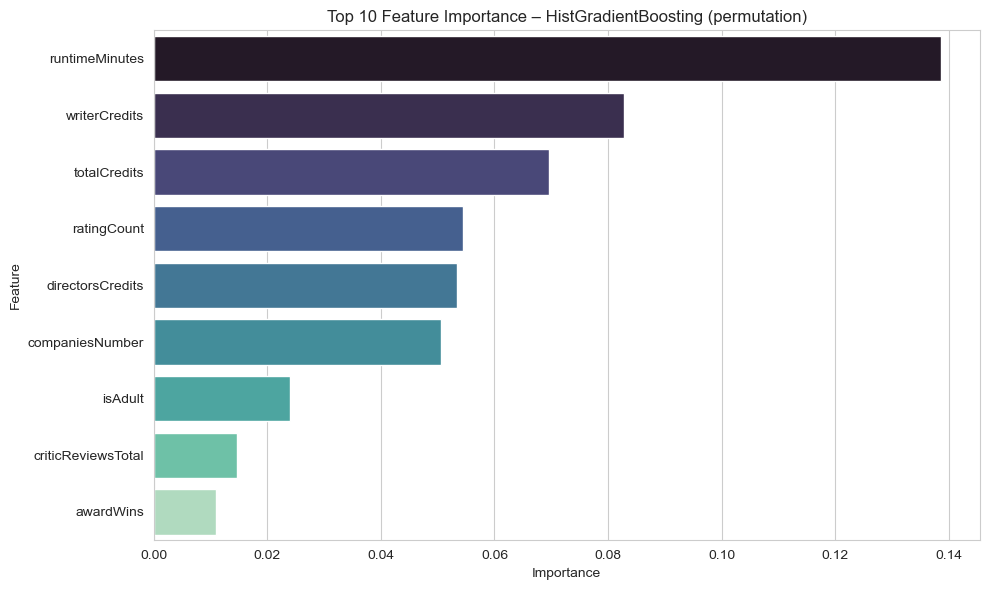

In [38]:
from sklearn.inspection import permutation_importance

# 1️⃣ Merr rëndësinë përmes permutation
result = permutation_importance(hgb_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# 2️⃣ Krijo DataFrame me rezultatet
feature_names = df[selected_cols].columns.tolist()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False).head(10)

# 3️⃣ Vizualizim
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='mako')
plt.title('Top 10 Feature Importance – HistGradientBoosting (permutation)')
plt.tight_layout()
plt.show()



📋 Classification Report – Gradient Boosting (sklearn):
              precision  recall  f1-score  support
Action             0.43    0.28      0.34   5679.0
Adult              0.97    1.00      0.98    784.0
Adventure          0.66    0.06      0.10   2728.0
Animation          0.42    0.32      0.36   2356.0
Biography          0.35    0.01      0.02    763.0
Comedy             0.37    0.64      0.47  10795.0
Crime              0.37    0.14      0.21   3045.0
Documentary        0.35    0.45      0.39   3947.0
Drama              0.34    0.46      0.39   7775.0
Family             0.65    0.03      0.06    584.0
Game-Show          0.35    0.17      0.23    463.0
Horror             0.30    0.09      0.14    700.0
Music              0.23    0.06      0.10    350.0
Other              0.28    0.09      0.13   2588.0
Reality-TV         0.35    0.27      0.30    836.0
Short              0.34    0.25      0.29    947.0
Western            0.42    0.25      0.31    520.0
accuracy            NaN   

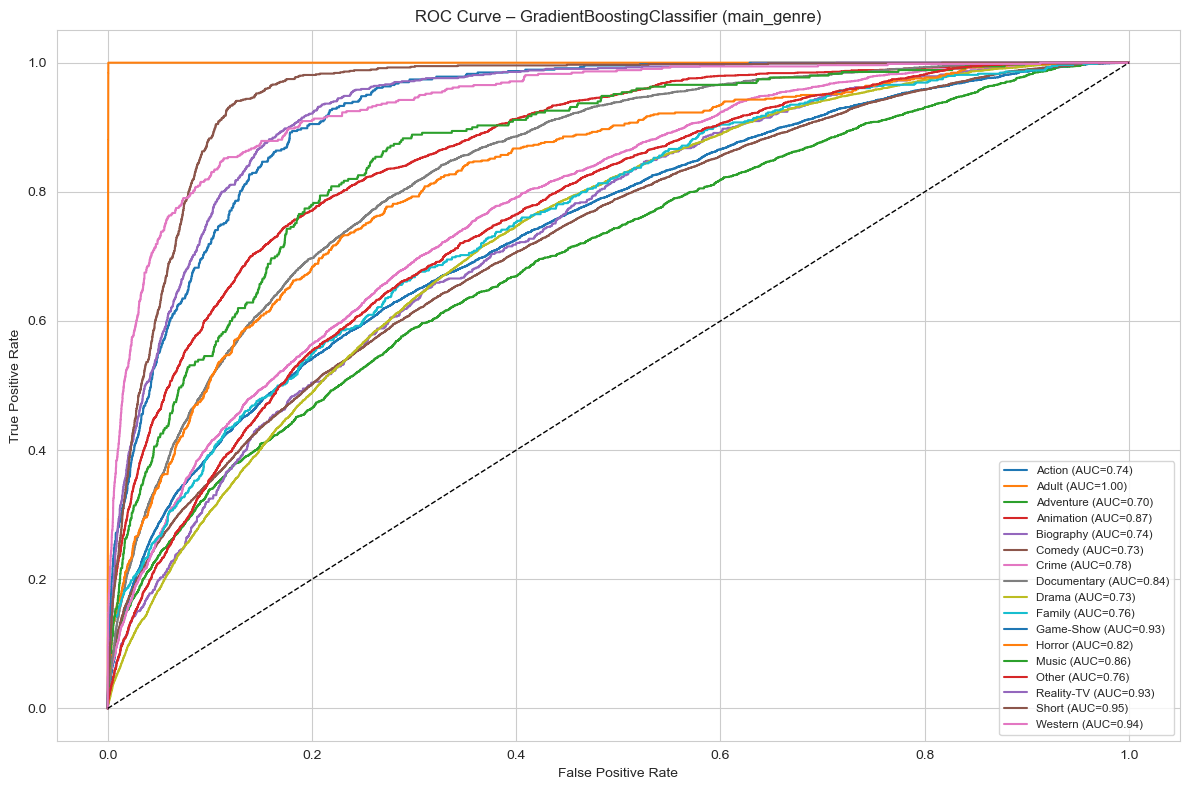

/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_81917/11548300.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='mako')


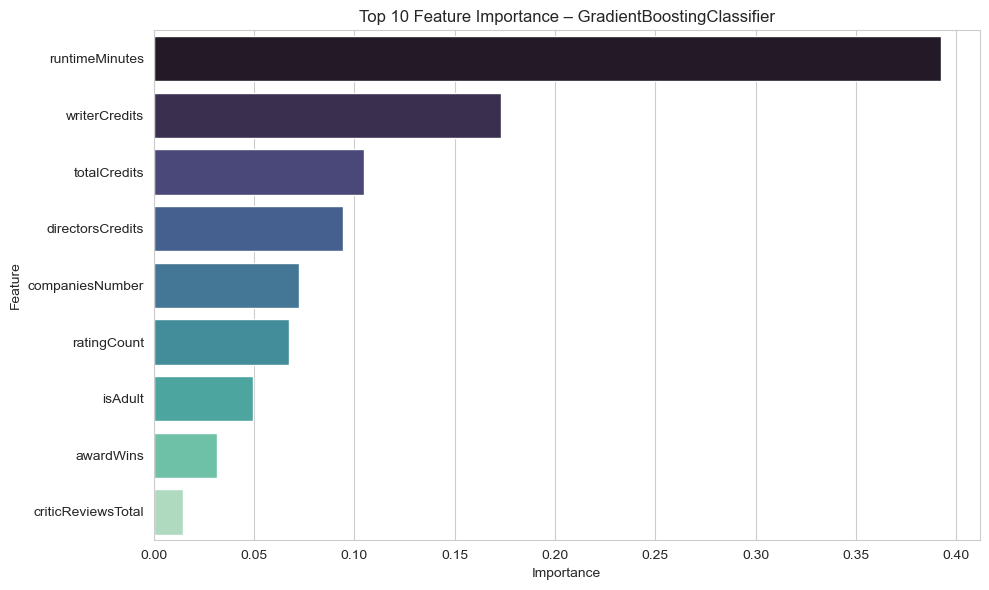

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# 1️⃣ Trajno modelin klasik
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# 2️⃣ Predikime
y_pred = gb_model.predict(X_test)
y_proba = gb_model.predict_proba(X_test)

# 3️⃣ Classification Report
report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

report_df = pd.DataFrame(report_dict).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

print("\n📋 Classification Report – Gradient Boosting (sklearn):")
print(report_df.round(2).to_string())

# 4️⃣ ROC Curve për çdo klasë
y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(12, 8))
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('ROC Curve – GradientBoostingClassifier (main_genre)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5️⃣ Feature Importance
feature_names = df[selected_cols].columns.tolist()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='mako')
plt.title('Top 10 Feature Importance – GradientBoostingClassifier')
plt.tight_layout()
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1276
[LightGBM] [Info] Number of data points in the train set: 104671, number of used features: 9
[LightGBM] [Info] Start training from score -2.066674
[LightGBM] [Info] Start training from score -4.047600
[LightGBM] [Info] Start training from score -2.800165
[LightGBM] [Info] Start training from score -2.946802
[LightGBM] [Info] Start training from score -4.074771
[LightGBM] [Info] Start training from score -1.424415
[LightGBM] [Info] Start training from score -2.690023
[LightGBM] [Info] Start training from score -2.430641
[LightGBM] [Info] Start training from score -1.752648
[LightGBM] [Info] Start training from score -4.340401
[LightGBM] [Info] Start training from score -4.572936
[LightGBM] [Info] Start training from score -4.161016

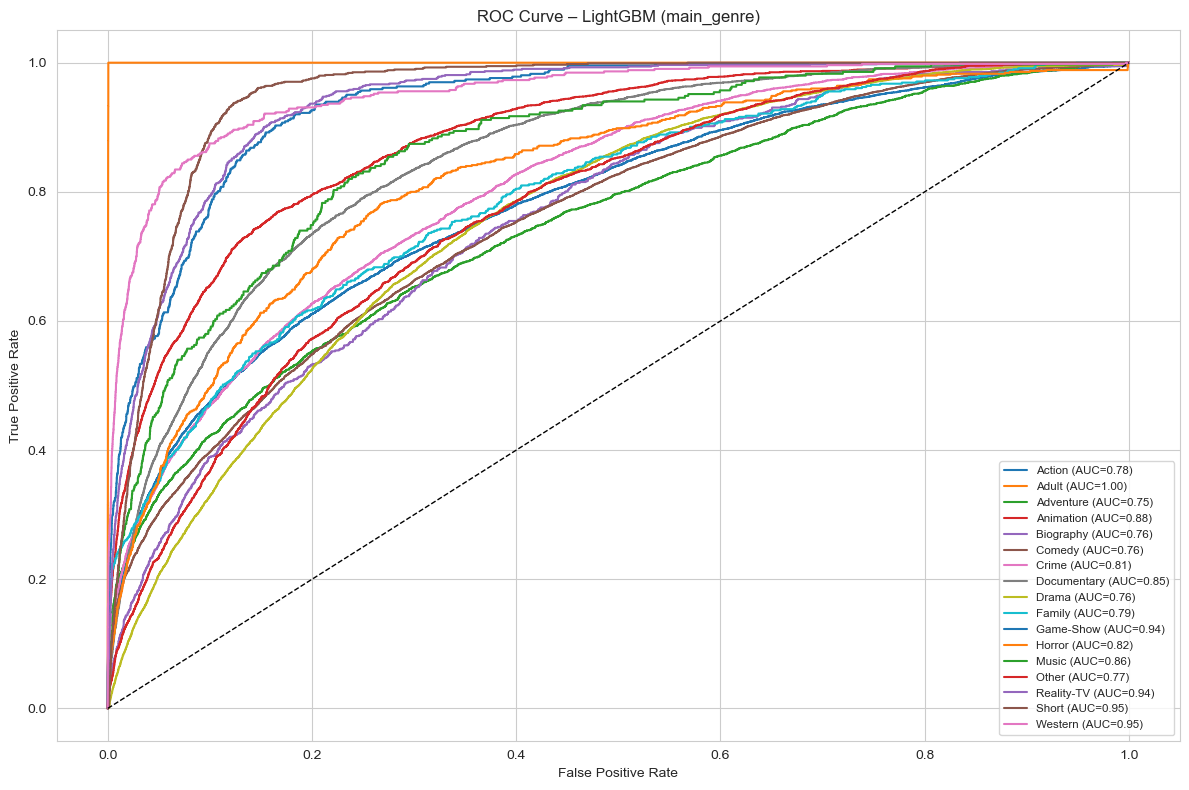

/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_81917/2295470117.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Blues')


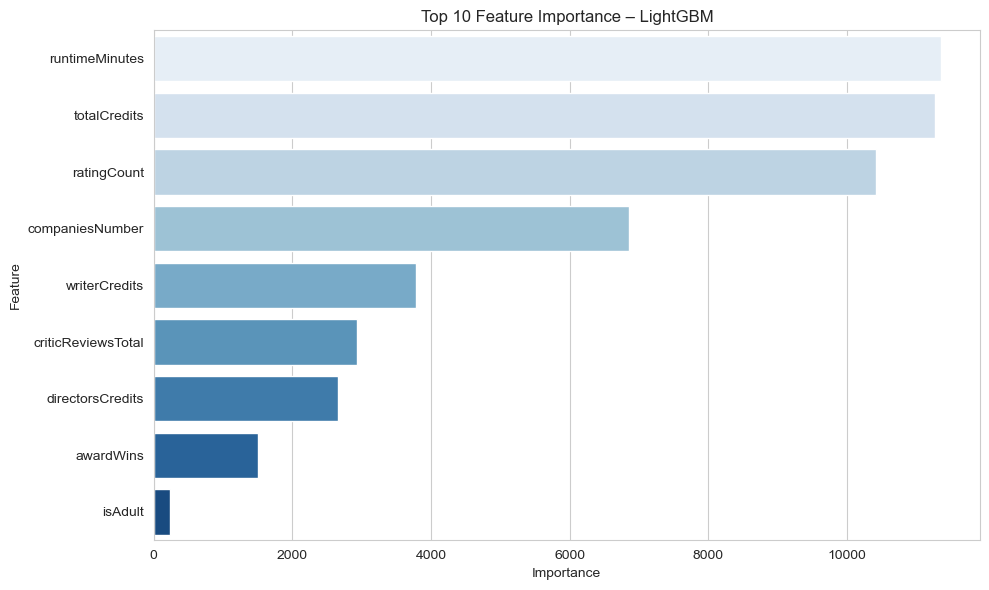

In [40]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1️⃣ Trajno modelin LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)

# 2️⃣ Predikimet
y_pred = lgb_model.predict(X_test)
y_proba = lgb_model.predict_proba(X_test)

# 3️⃣ Classification Report
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

report_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

print("\n📋 Classification Report – LightGBM:")
print(report_df.round(2).to_string())

# 4️⃣ ROC Curve
y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
fpr, tpr, roc_auc = {}, {}, {}

plt.figure(figsize=(12, 8))
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('ROC Curve – LightGBM (main_genre)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5️⃣ Feature Importance
feature_names = df[selected_cols].columns.tolist()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Blues')
plt.title('Top 10 Feature Importance – LightGBM')
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📋 Classification Report – CatBoost:
              precision  recall  f1-score  support
Action             0.42    0.29      0.34   5679.0
Adult              0.97    1.00      0.98    784.0
Adventure          0.69    0.04      0.08   2728.0
Animation          0.42    0.29      0.35   2356.0
Biography          0.60    0.00      0.01    763.0
Comedy             0.37    0.65      0.47  10795.0
Crime              0.34    0.11      0.16   3045.0
Documentary        0.34    0.43      0.38   3947.0
Drama              0.33    0.48      0.39   7775.0
Family             0.00    0.00      0.00    584.0
Game-Show          0.37    0.06      0.10    463.0
Horror             0.41    0.04      0.08    700.0
Music              0.00    0.00      0.00    350.0
Other              0.29    0.07      0.12   2588.0
Reality-TV         0.35    0.17      0.23    836.0
Short              0.29    0.24      0.27    947.0
Western            1.00    0.06      0.12    520.0
accuracy            NaN     NaN      0.37    

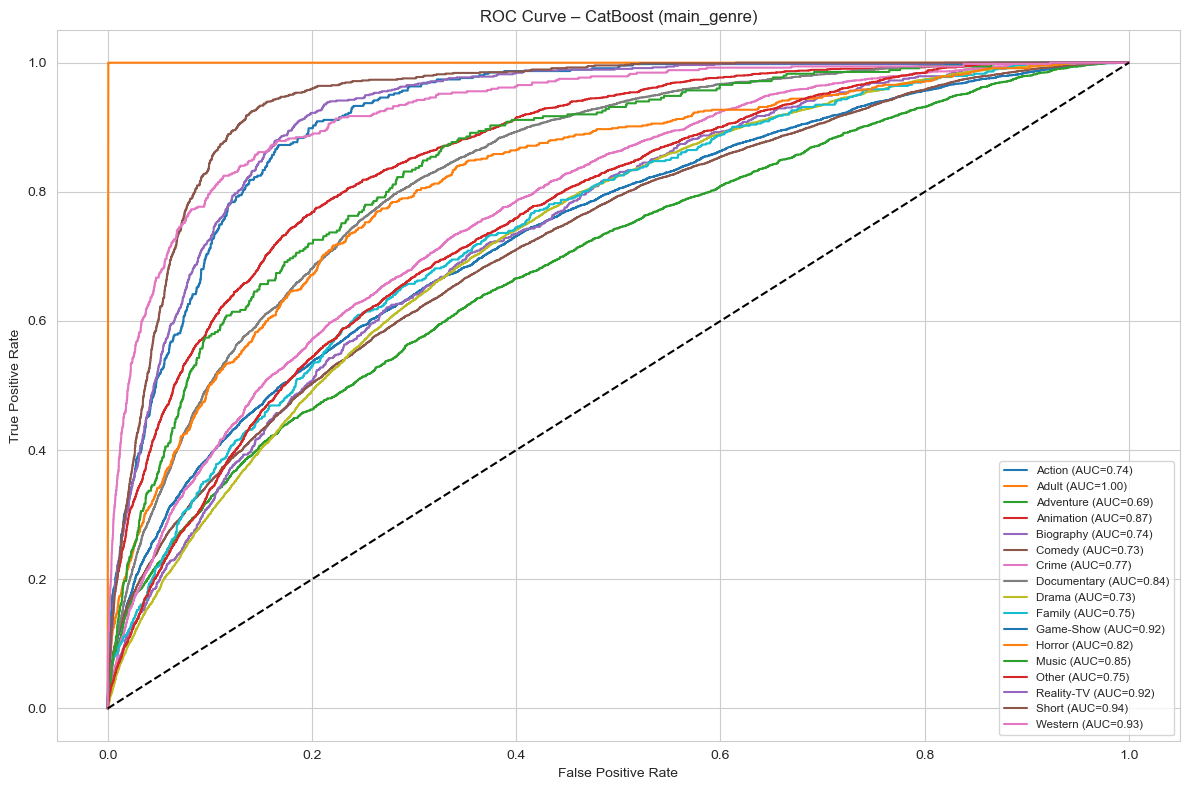

/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_81917/3287280312.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='light:#5A9')


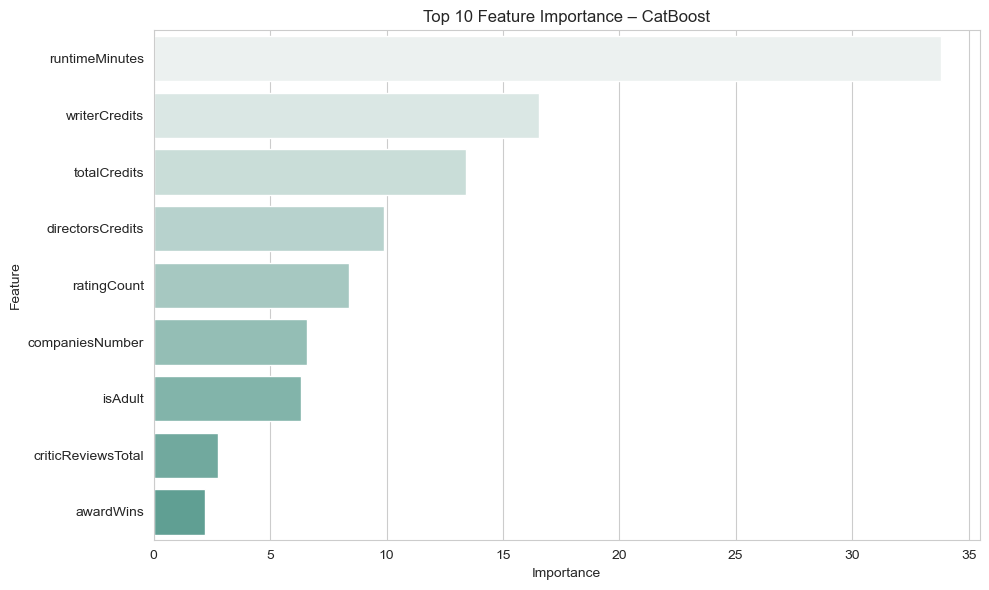

In [42]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1️⃣ Trajno CatBoostClassifier
cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0,           # mos printojë çdo iteracion
    random_state=42
)
cat_model.fit(X_train, y_train)

# 2️⃣ Parashiko
y_pred = cat_model.predict(X_test)
y_proba = cat_model.predict_proba(X_test)

# 3️⃣ Classification Report
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

report_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

print("\n📋 Classification Report – CatBoost:")
print(report_df.round(2).to_string())

# 4️⃣ ROC Curve
y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
fpr, tpr, roc_auc = {}, {}, {}

plt.figure(figsize=(12, 8))
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve – CatBoost (main_genre)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5️⃣ Feature Importance
feature_names = df[selected_cols].columns.tolist()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': cat_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='light:#5A9')
plt.title('Top 10 Feature Importance – CatBoost')
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:46:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📋 Classification Report – XGBoost:
              precision  recall  f1-score  support
Action             0.47    0.34      0.40   5679.0
Adult              0.97    1.00      0.98    784.0
Adventure          0.69    0.12      0.20   2728.0
Animation          0.46    0.35      0.39   2356.0
Biography          0.37    0.02      0.05    763.0
Comedy             0.39    0.64      0.49  10795.0
Crime              0.45    0.19      0.27   3045.0
Documentary        0.37    0.47      0.41   3947.0
Drama              0.35    0.48      0.40   7775.0
Family             0.63    0.11      0.19    584.0
Game-Show          0.39    0.21      0.27    463.0
Horror             0.34    0.09      0.14    700.0
Music              0.19    0.03      0.05    350.0
Other              0.33    0.09      0.14   2588.0
Reality-TV         0.38    0.28      0.33    836.0
Short              0.34    0.21      0.26    947.0
Western            0.47    0.26      0.33    520.0
accuracy            NaN     NaN      0.40     

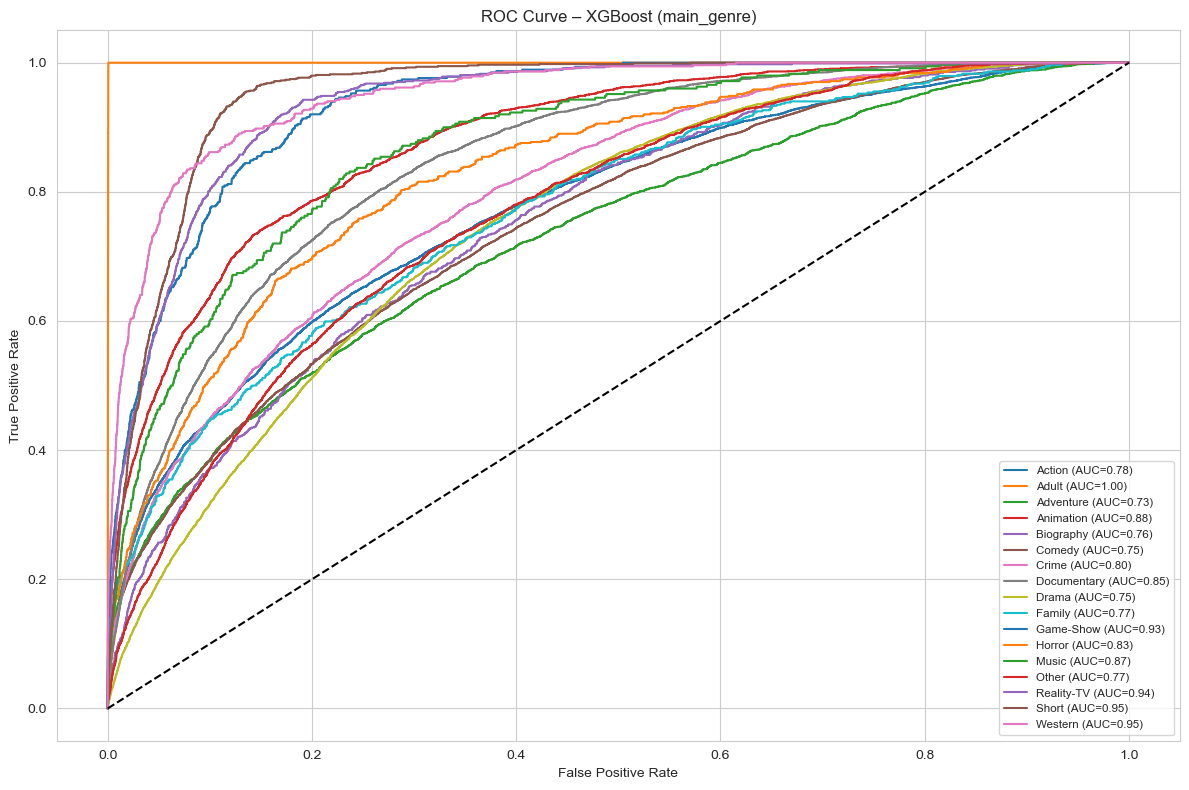

/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_81917/239854632.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='ch:s=.25,rot=-.25')


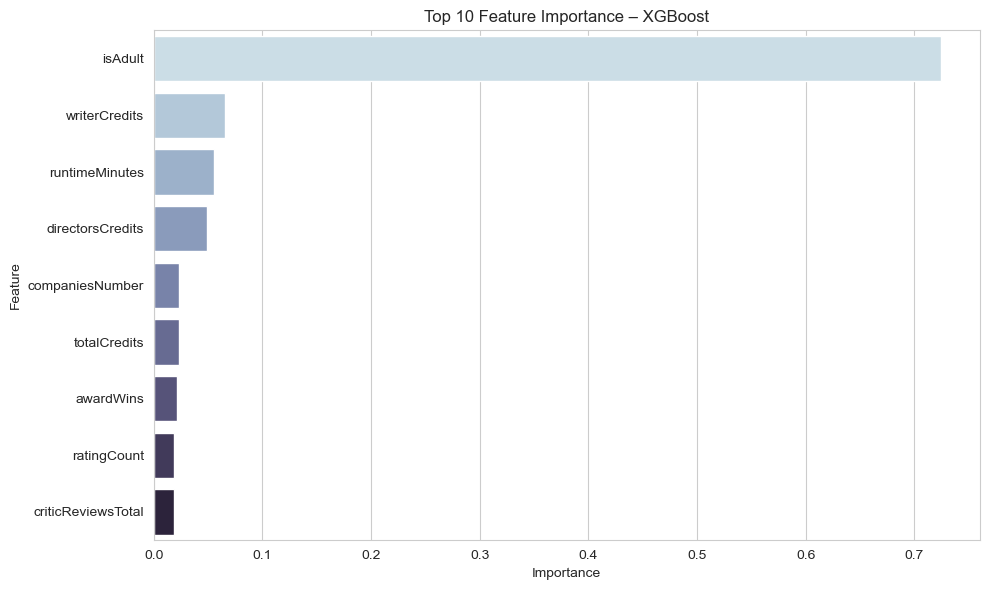

In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1️⃣ Trajno modelin
xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_train)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 2️⃣ Parashiko
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)

# 3️⃣ Classification Report
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

report_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

print("\n📋 Classification Report – XGBoost:")
print(report_df.round(2).to_string())

# 4️⃣ ROC Curve për të gjitha klasat
y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
fpr, tpr, roc_auc = {}, {}, {}

plt.figure(figsize=(12, 8))
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve – XGBoost (main_genre)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5️⃣ Feature Importance
feature_names = df[selected_cols].columns.tolist()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='ch:s=.25,rot=-.25')
plt.title('Top 10 Feature Importance – XGBoost')
plt.tight_layout()
plt.show()
